# Practice 8-9 - Clustering and PCA

We will work again on the iris data set. The data have labels here, but we will check if unsupervised learning can make good guesses.

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import *
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy import stats
# Prepare the features
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [2]:
dataset = pd.read_csv('iris.csv').drop('species', axis=1)

*This small dataset from 1936 is often used for testing out machine learning algorithms and visualizations. Each row of the table represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters.*

In [3]:
dataset.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width
5,5.4,3.9,1.7,0.4
139,6.9,3.1,5.4,2.1
9,4.9,3.1,1.5,0.1
77,6.7,3.0,5.0,1.7
16,5.4,3.9,1.3,0.4


# Your Task
You will use the two clustering algorithms you know on this dataset to see if it can group the iris specimen reasonably well.

## 1- Data Visualization
### Plot **sepal width** vs. **sepal length** in a scatter plot to see how your specimen are distributed on that 2D feature space.

In [4]:


corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


We have two features, such as "petal_width" and "petal_length," and they have a high correlation, meaning they represent similar information, we may choose to use only one of them in our analysis to avoid redundancy.

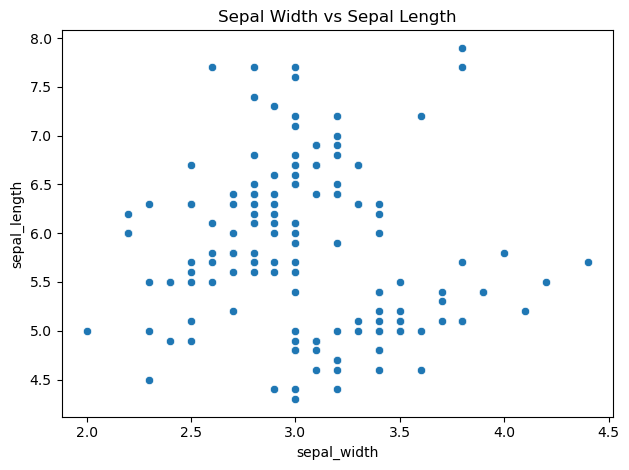

In [5]:

sns.scatterplot(x="sepal_width", y="sepal_length", data=dataset)
plt.title('Sepal Width vs Sepal Length')
plt.tight_layout()
plt.show()

## 2- K-means
### Train a k-Means model for 3 clusters <u>with these two features</u> and plot the results.  
Hints:  
- Don't forget feature scaling!
- For the plot (fill in the code provided below):
    - Your clusters should appear in different colors
    - You can loop over your clusters and call the plt.scatter() for each of the k clusters. 
    - When you plot a cluster, you can use the keyword argument color='...' to specify the color of the points, and label='...' for the legend.
    - Call plt.legend() to display the legend (indicating to what cluster belongs each data point)
    - Label the axes
    - Give a title to your graph

In [6]:

def preprocess_data(dataset: pd.DataFrame):
    dataset = dataset.drop_duplicates().reset_index(drop=True)
    numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
    imputer = SimpleImputer(strategy='mean')
    dataset[numeric_cols] = imputer.fit_transform(dataset[numeric_cols])
    
    scaler = StandardScaler()
    dataset[numeric_cols] = scaler.fit_transform(dataset[numeric_cols])

    for col in numeric_cols:
        z_scores = stats.zscore(dataset[col])
        threshold = 3
        mask = (abs(z_scores) <= threshold)
        dataset = dataset[mask]
    
    return dataset


In [7]:
dataset_cleaned_all_data = preprocess_data(dataset)
selected_columns = ["sepal_width", "sepal_length"]
dataset_cleaned = dataset_cleaned_all_data[selected_columns]  # Keep only the selected columns

In [8]:
# Train k-means
from sklearn.cluster import KMeans

k=3
kmeans = KMeans(n_clusters = k) 
kmeans.fit(dataset_cleaned)

/Users/xenanurbilgin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [9]:
print(kmeans.labels_) ## clusters
print(kmeans.inertia_) ## Compute the final WCSS (within-cluster sum of squares) - a.k.a inertia distances between each point and its centroid for increasing values of k.


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 2 2
 2 0 0 0 0 0 0 0 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0
 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 2 2 2 0 2 2 0]
95.87682999651952


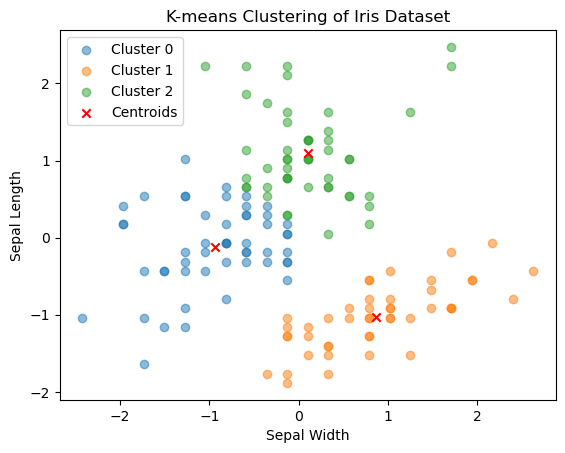

In [10]:
for cluster_label in range(k):  
    cluster_data = dataset_cleaned[kmeans.labels_ == cluster_label]
    plt.scatter(cluster_data['sepal_width'], cluster_data['sepal_length'], label=f'Cluster {cluster_label}', alpha=0.5)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', label='Centroids')

# Labeling the axes
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')

# Adding a title
plt.title('K-means Clustering of Iris Dataset')

# Displaying the legend
plt.legend()

# Showing the plot
plt.show()


In [11]:
# Predict cluster labels for the entire dataset
predicted_labels = kmeans.predict(dataset_cleaned)



## 3- Hierarchical Clustering
You first need to choose which likage methode you want to use.  
You will first visualize the dendrogram (from scipy) with different likage methods to pick the one that seems most appropriate.  
You will then train an sklearn agglomerative clustering model with the linkage method you chose.
### 3a) Build at least 4 dendrograms, one with each linkage method we have seen. 
- Your graphs should have axis labels
- The title of the graphs should indicate what linkage method was used.

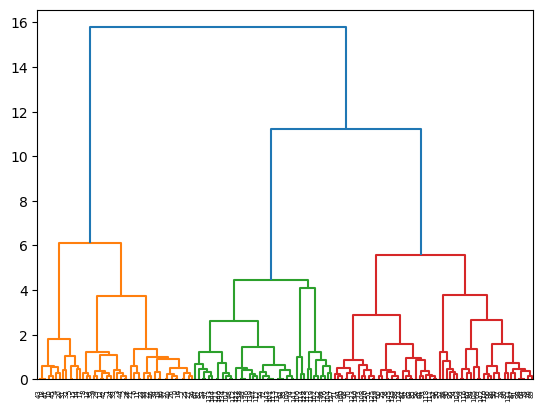

In [12]:
from scipy.cluster import hierarchy
#- Ward linkage: variance of the clusters being merged
dendrogram = hierarchy.dendrogram(hierarchy.linkage(dataset_cleaned, method = 'ward')) 

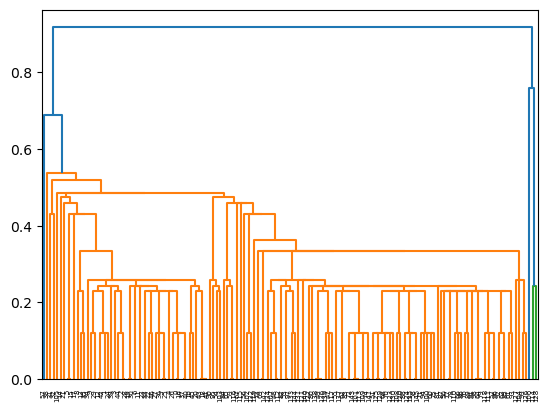

In [13]:
 #Minimum of the distances between all observations of the two sets
dendrogram = hierarchy.dendrogram(hierarchy.linkage(dataset_cleaned, method = 'single'))

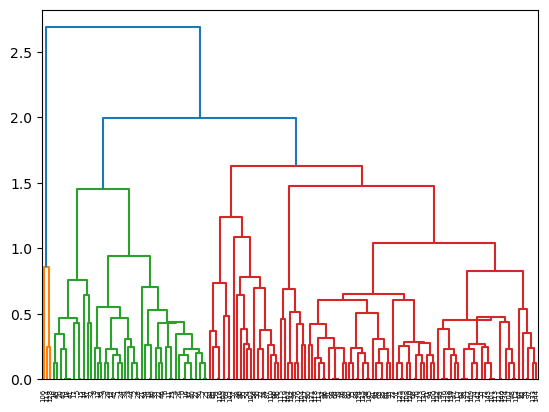

In [14]:
# Distance between cluster centroids
dendrogram = hierarchy.dendrogram(hierarchy.linkage(dataset_cleaned, method = 'centroid'))

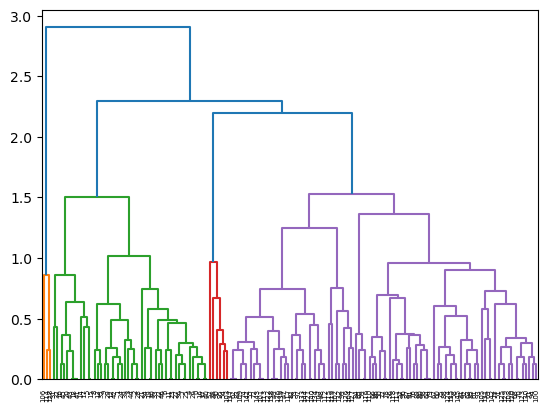

In [15]:
# Average of the distances of each observation of the two sets
dendrogram = hierarchy.dendrogram(hierarchy.linkage(dataset_cleaned, method = 'average'))

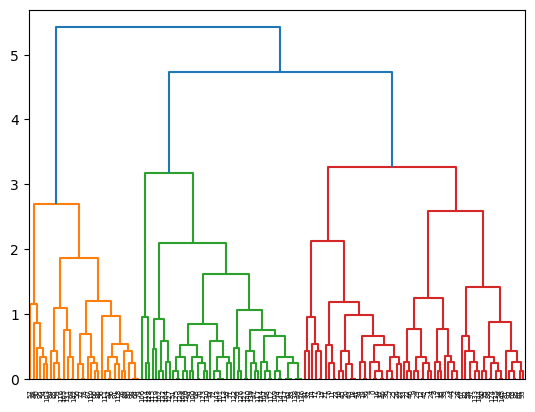

In [16]:
#maximum distances between all observations of the two sets
dendrogram = hierarchy.dendrogram(hierarchy.linkage(dataset_cleaned, method = 'complete'))

### Comment and pick the linkage that seems the most appropriate (explain your choice)

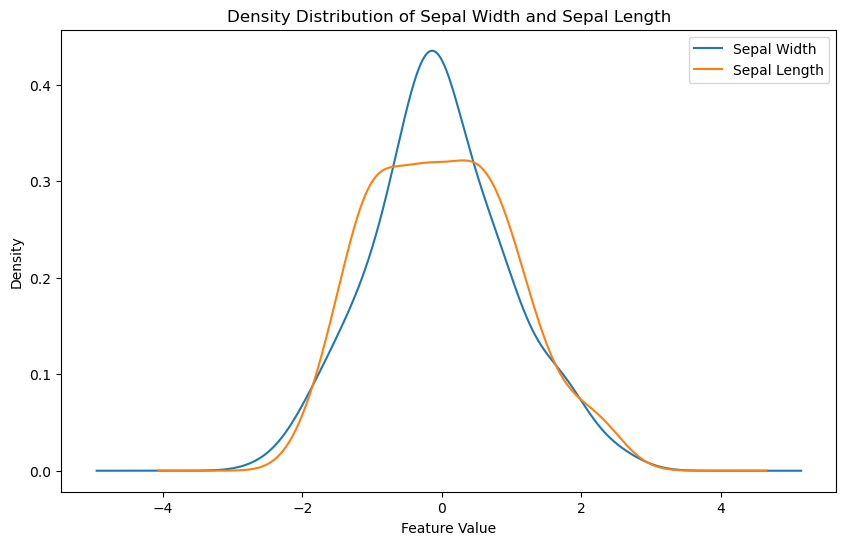

Mean Sepal Length: 0.0012969792941528993
Std Sepal Length: 1.0067492842129533
Mean Sepal Width: -0.021140190640357295
Std Sepal Width: 0.973470392707816


In [17]:
plt.figure(figsize=(10, 6))
dataset_cleaned['sepal_width'].plot(kind='density', label='Sepal Width')
dataset_cleaned['sepal_length'].plot(kind='density', label='Sepal Length')

plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.title('Density Distribution of Sepal Width and Sepal Length')
plt.legend()
plt.show()

print("Mean Sepal Length:", dataset_cleaned['sepal_length'].mean())
print("Std Sepal Length:", dataset_cleaned['sepal_length'].std())

print("Mean Sepal Width:", dataset_cleaned['sepal_width'].mean())
print("Std Sepal Width:", dataset_cleaned['sepal_width'].std())


I need clusters of similar sizes and compact shapes, therefore, Ward linkage might be appropriate. Also, we are not dealing with noisy data, so we can minimize the variance when merging clusters to produce clusters of similar sizes, and it is suitable for datasets with normally distributed data. We can choose 3 or 5 clusters since it is the optimal values to successfully define the clusters.

### 3b) Train an AgglomerativeClustering (sklearn) model for 3 clusters with the linkage you chose and plot the results.  
Here your plot should display the point cloud with the cluster assignment, like you did in question 2.

In [18]:
# Train
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean',
   linkage = 'ward')
clusters = hc.fit_predict(dataset_cleaned)

/Users/xenanurbilgin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


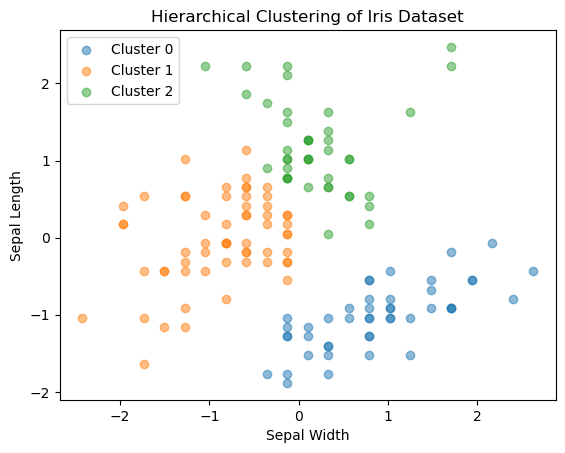

In [20]:
k=3
for cluster_label in range(k):  
    cluster_data = dataset_cleaned[clusters == cluster_label]
    plt.scatter(cluster_data['sepal_width'], cluster_data['sepal_length'], label=f'Cluster {cluster_label}', alpha=0.5)

plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.title('Hierarchical Clustering of Iris Dataset')
plt.legend()
plt.show()

## 4- PCA
In this part, instead of clustering on actual features, we will use the fist two principal components obtained with PCA

### 4a) Fit PCA on all four scaled features

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pca.fit(dataset_cleaned_all_data)

PCA(n_components=4)

### 4b) Make a density plot for each of the 4 principal components. 

/Users/xenanurbilgin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/xenanurbilgin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/xenanurbilgin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/xenanurbilgin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

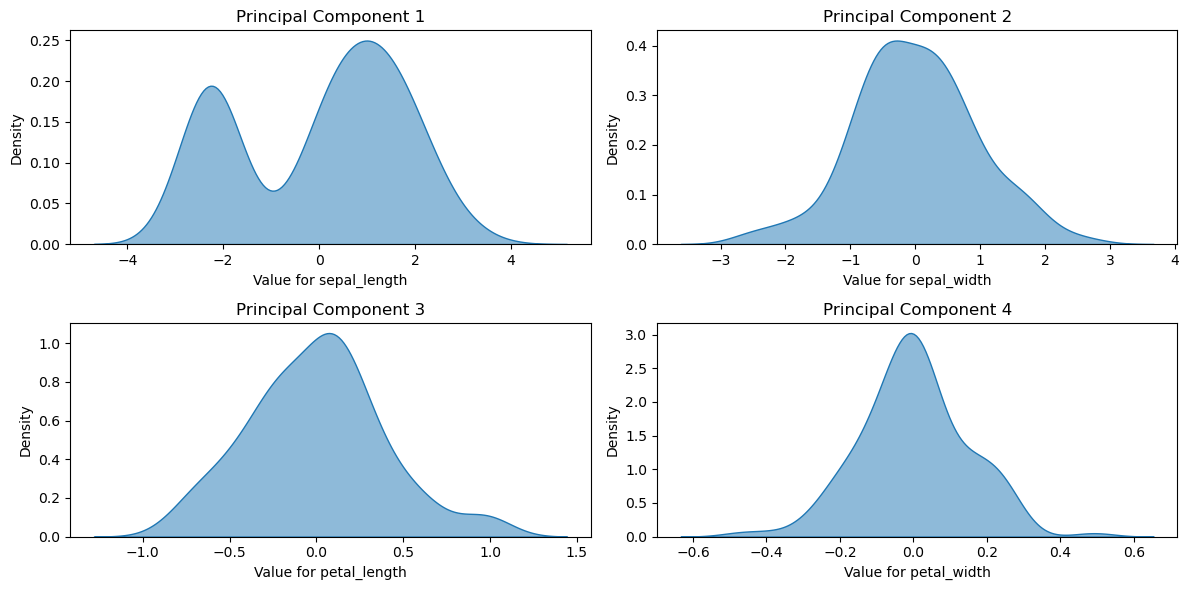

In [22]:
dataset_cleaned_all_data_pca = pca.transform(dataset_cleaned_all_data)
feature_names = dataset_cleaned_all_data.columns.tolist()  # Replace with actual feature names if available
plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(dataset_cleaned_all_data_pca[:, i], fill=True, alpha=0.5)
    plt.title(f'Principal Component {i+1}')
    plt.xlabel('Value')  # Use generic label if feature names are not available
    plt.ylabel('Density')
    if feature_names:
        plt.xlabel('Value for ' + feature_names[i])  # Use feature names if available
plt.tight_layout()
plt.show()


### Comment your plots and explain how they help you judge on the variance captured by each principal component.

The shape of the density curve provides information about the distribution of values along each principal component. Principle Component 1 and 2 curves are broader and flatter, it suggests that the principal component covers a wider range of values, potentially explaining more variance in the data. Principle Component 3 and 4 curves are not peaked and narrow, it indicates that the principal component captures a smaller range of values and thus may not explain less variance in the data.


### 4c) What percentage of the explained variance do the first two principal components account for together?
Show evidence of how you found the answer

In [23]:
# The cumulative variance explained by each principal component can be obtained from the PCA model:
print(pca.explained_variance_ratio_)
print(f"Total amount of variance explained by first 2 principal component models: {pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]} ")

[0.73434141 0.22243173 0.0378288  0.00539807]
Total amount of variance explained by first 2 principal component models: 0.9567731321467238 


In [24]:
pca.components_

array([[ 0.52995531, -0.24422536,  0.5814295 ,  0.56695774],
       [-0.3619367 , -0.93065084, -0.00939787, -0.0529388 ],
       [-0.71987506,  0.24241709,  0.13825799,  0.63553016],
       [-0.26444109,  0.12440635,  0.80170827, -0.52139987]])

### 4d) Use the code provided below to display the original features as vectors on the plane of your principal components.

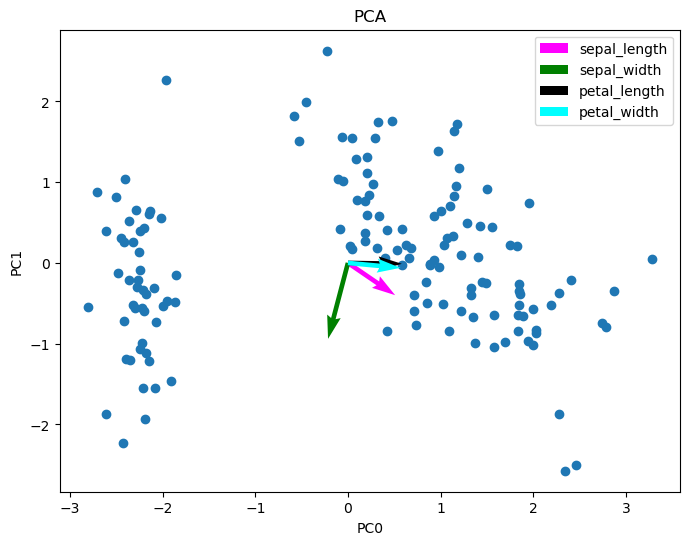

In [25]:
## Assign values these two variables to run the code

pca = pca
principal_components = dataset_cleaned_all_data_pca


### No need to touch this code ###
fig = plt.figure(figsize=(8,6))

# Plotting the data points with respect to the first two principal components
plt.scatter(principal_components[:,0], principal_components[:,1])

# Displaying the orignial features as vectors on the plane
for i_feature, feature in enumerate(dataset.columns):
    plt.quiver(pca.components_[0,i_feature], pca.components_[1,i_feature], scale=1, scale_units='xy', label = feature, color = ['magenta', 'green', 'black', 'cyan'][i_feature])

plt.title('PCA')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.legend()
plt.show()

### Using the plot, explain which feature contributes the most to the second principal component?

Sepal with because it could show the variation of the data points in y axis, in other words, it inspect how the data points are distributed along this particular feature.

## BONUS: Try 4D clustering with all 4 features and plot the results on the feature plane of sepal length and sepal width